# Analisi di 100 misure del periodo di un pendolo - Prima parte

In [362]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [363]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("font", size=16, family="STIXGeneral")

## Lettura dei dati raccolti

In [364]:
indici, dati = np.loadtxt("./data/TempiReazione.txt", skiprows=10 , unpack=True)
dati

array([204., 193., 206., 209., 182., 208., 208., 202., 206., 201., 195.,
       203., 200., 193., 210., 197., 195., 201., 197., 200., 205., 192.,
       215., 207., 186., 187., 191., 207., 193., 205., 201., 208., 203.,
       201., 196., 200., 196., 212., 211., 204., 180., 206., 200., 194.,
       199., 197., 217., 204., 202., 190.])

In [365]:
dati.size

50

## Calcolo dei principali indici statistici

### Calcolo dei valori di media, mediana e moda

In [366]:
dati_ordinati= np.sort(dati)
dati_ordinati

array([180., 182., 186., 187., 190., 191., 192., 193., 193., 193., 194.,
       195., 195., 196., 196., 197., 197., 197., 199., 200., 200., 200.,
       200., 201., 201., 201., 201., 202., 202., 203., 203., 204., 204.,
       204., 205., 205., 206., 206., 206., 207., 207., 208., 208., 208.,
       209., 210., 211., 212., 215., 217.])

In [367]:
media = dati.mean()
print("Media: %.2f ms" % media)

Media: 200.38 ms


In [368]:
mediana = np.median(dati_ordinati)
print("Mediana: %.2f ms" % mediana)

Mediana: 201.00 ms


In [369]:
moda = stats.mode(dati_ordinati)
print("Moda: %.2f ms" % moda[0])

Moda: 200.00 ms


### Calcolo degli scarti

In [370]:
scarti = dati - media
print("Scarti:", scarti)

Scarti: [  3.62  -7.38   5.62   8.62 -18.38   7.62   7.62   1.62   5.62   0.62
  -5.38   2.62  -0.38  -7.38   9.62  -3.38  -5.38   0.62  -3.38  -0.38
   4.62  -8.38  14.62   6.62 -14.38 -13.38  -9.38   6.62  -7.38   4.62
   0.62   7.62   2.62   0.62  -4.38  -0.38  -4.38  11.62  10.62   3.62
 -20.38   5.62  -0.38  -6.38  -1.38  -3.38  16.62   3.62   1.62 -10.38]


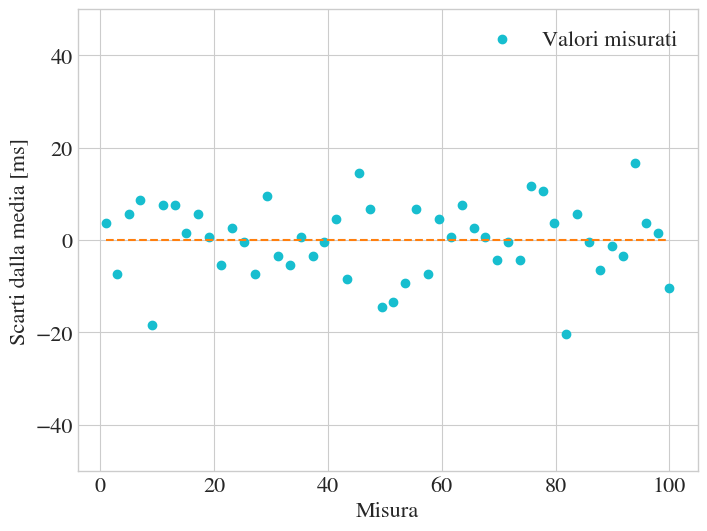

In [371]:
x = np.linspace(1, 100, 50)
y = scarti

fig, ax = plt.subplots(figsize=(8,6))

ax.set_ylim(-50, 50)
ax.set_xlabel('Misura')
ax.set_ylabel('Scarti dalla media [ms]')

ax.plot([1, 100], [0, 0], color='C1', linestyle='--')
ax.scatter(x, scarti, color="C9", label="Valori misurati")

ax.legend()

### Calcolo dei valori di varianza, deviazione standard e deviazione standard della media

In [372]:
varianza_emp = dati.var(ddof=1)
print("Varianza empirica: %.4f ms^2" % varianza_emp)

Varianza empirica: 63.3833 ms^2


In [373]:
varianza_pop = dati.var()
print("Varianza popolazione: %.4f ms^2" % varianza_pop)

Varianza popolazione: 62.1156 ms^2


In [374]:
print("Differenza percentuale: %.4f%%" % ((varianza_emp - varianza_pop) / varianza_pop * 100))

Differenza percentuale: 2.0408%


In [375]:
devstd_emp = np.sqrt(varianza_emp)
print("Deviazione standard empirica: %.4f ms" % devstd_emp)

Deviazione standard empirica: 7.9614 ms


In [376]:
devstd_pop = dati.std()
print("Deviazione standard popolazione: %.4f ms" % devstd_pop)

Deviazione standard popolazione: 7.8813 ms


In [377]:
print("Differenza percentuale: %.4f%%" % ((devstd_emp - devstd_pop) / devstd_pop * 100))

Differenza percentuale: 1.0153%


In [378]:
devstd_media = devstd_emp / np.sqrt(dati.size)
print("Deviazione standard della media: %.4f ms" % devstd_media)

Deviazione standard della media: 1.1259 ms


## 3. Processo di scarto tramite criterio del $3 \sigma$

In [379]:
dati_acc = np.array([d for d in dati if np.absolute(d - media) < 3 * devstd_emp])
dati_acc

array([204., 193., 206., 209., 182., 208., 208., 202., 206., 201., 195.,
       203., 200., 193., 210., 197., 195., 201., 197., 200., 205., 192.,
       215., 207., 186., 187., 191., 207., 193., 205., 201., 208., 203.,
       201., 196., 200., 196., 212., 211., 204., 180., 206., 200., 194.,
       199., 197., 217., 204., 202., 190.])

In [380]:
print("Dati accettati: %d" % dati_acc.size)

Dati accettati: 50


In [381]:
print("Dati scartati: %d" % (dati.size - dati_acc.size))

Dati scartati: 0


### 3.1. Percentuale di dati nell'intervallo $\bar{x} \pm \sigma$

In [382]:
dati_1_sigma = np.array([d for d in dati if np.absolute(d - media) < devstd_emp])
print("Dati entro una deviazione standard: %d%%" % dati_1_sigma.size)

Dati entro una deviazione standard: 37%


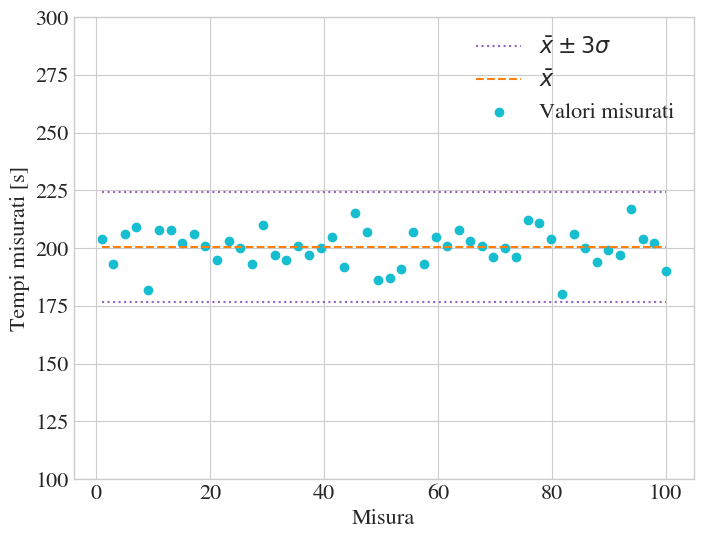

In [383]:
x = np.linspace(1, 100, 50)
y = scarti

fig, ax = plt.subplots(figsize=(8,6))

ax.set_ylim(100, 300)
ax.set_xlabel('Misura')
ax.set_ylabel('Tempi misurati [s]')

ax.plot([1, 100], [media + 3 * devstd_emp, media + 3 * devstd_emp], color="C4", linestyle=":", label=r"$\bar{x} \pm 3\sigma$")
ax.plot([1, 100], [media - 3 * devstd_emp, media - 3 * devstd_emp], color="C4", linestyle=":")
ax.plot([1, 100], [media, media], color="C1", linestyle="--", label=r"$\bar{x}$")
ax.scatter(x, dati, color="C9", label="Valori misurati")

ax.legend()

## Valore della misura finale

In [384]:
print("Incertezza: %.2f ms" % devstd_media)

Incertezza: 1.13 ms


In [385]:
print("Miglior stima: %.2f ms" % media)

Miglior stima: 200.38 ms


**T = 200.4 $\pm$ 1.1 ms**

## Istogrammi

### Larghezza delle classi pari all'incertezza di sensibilità

In [386]:
print("Valore minimo: %.2f ms" % dati.min())

Valore minimo: 180.00 ms


In [387]:
print("Valore massimo: %.2f ms" % dati.max())

Valore massimo: 217.00 ms


In [388]:
n_classi = int((dati.max() - dati.min()) / 1.1)
print("Numero di classi %d" % n_classi)

Numero di classi 33


In [389]:
larghezza = (dati.max() - dati.min()) / n_classi
print("Larghezza di ciascuna classe: %.2f ms" % larghezza)

Larghezza di ciascuna classe: 1.12 ms


In [390]:
intervallo = (dati.min() - 1.1 / 2, dati.max() + 1.1 / 2)
print("Intervallo (%.3f, %.3f)" % intervallo)

Intervallo (179.450, 217.550)


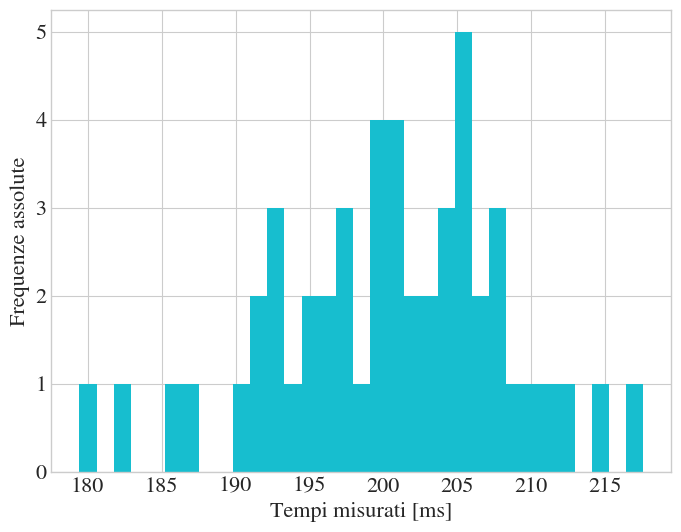

In [391]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xlabel("Tempi misurati [ms]")
ax.set_ylabel("Frequenze assolute")

frequenze, classi, _ = ax.hist(dati, n_classi, range=intervallo, color="C9")

In [392]:
print("Numero totale di eventi: %d" % np.sum(frequenze))

Numero totale di eventi: 50


In [393]:
print("Frequenze assolute:", frequenze)

Frequenze assolute: [1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 2. 3. 1. 2. 2. 3. 1. 4. 4. 2. 2. 3. 5. 2.
 3. 1. 1. 1. 1. 0. 1. 0. 1.]


In [394]:
classi = np.round(classi, decimals=3)
print("Classi:", classi)

Classi: [179.45  180.605 181.759 182.914 184.068 185.223 186.377 187.532 188.686
 189.841 190.995 192.15  193.305 194.459 195.614 196.768 197.923 199.077
 200.232 201.386 202.541 203.695 204.85  206.005 207.159 208.314 209.468
 210.623 211.777 212.932 214.086 215.241 216.395 217.55 ]


### Restrizioni del numeri di classi pari a quattordici

In [395]:
n_classi = int((dati.max() - dati.min()) / 2.5)
print("Numero di classi %d" % n_classi)

Numero di classi 14


In [396]:
larghezza = (dati.max() - dati.min()) / n_classi
print("Larghezza di ciascuna classe: %.2f ms" % larghezza)

Larghezza di ciascuna classe: 2.64 ms


In [397]:
intervallo = (dati.min() - 2.5 / 2, dati.max() + 2.5 / 2)
print("Intervallo (%.3f, %.3f)" % intervallo)

Intervallo (178.750, 218.250)


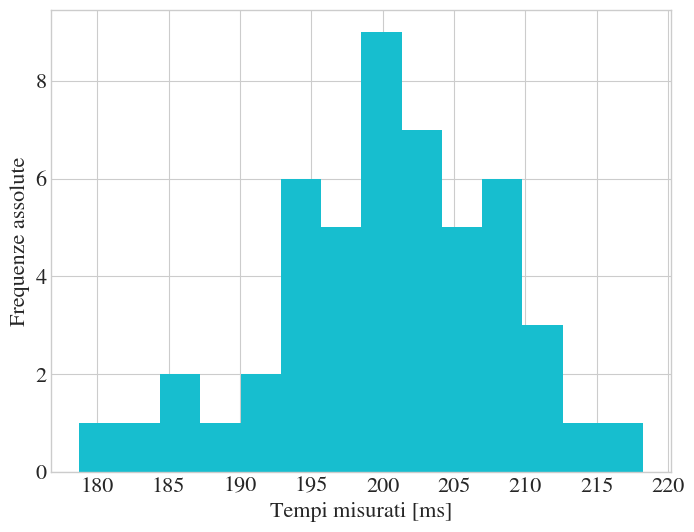

In [398]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xlabel("Tempi misurati [ms]")
ax.set_ylabel("Frequenze assolute")

frequenze, classi, _ = ax.hist(dati, n_classi, range=intervallo, color="C9")

In [399]:
print("Numero totale delle frequenze: %d" % np.sum(frequenze))

Numero totale delle frequenze: 50


In [400]:
print("Frequenze assolute:", frequenze)

Frequenze assolute: [1. 1. 2. 1. 2. 6. 5. 9. 7. 5. 6. 3. 1. 1.]


In [401]:
classi = np.round(classi, decimals=3)
print("Classi:", classi)

Classi: [178.75  181.571 184.393 187.214 190.036 192.857 195.679 198.5   201.321
 204.143 206.964 209.786 212.607 215.429 218.25 ]


### Calcolo dei punti centrali delle classi

In [402]:
centri = np.round(classi[:-1] + larghezza / 2, decimals=3)
print("Punti centrali delle classi:", centri)

Punti centrali delle classi: [180.071 182.892 185.714 188.535 191.357 194.178 197.    199.821 202.642
 205.464 208.285 211.107 213.928 216.75 ]


## Tabella riassuntiva dell'istogramma

### Calcolo degli indici statistici con le formule di aggregazione

In [403]:
media_aggr = np.sum(centri * frequenze) / np.sum(frequenze)
print("Media %.2f ms" % media_aggr)

Media 200.27 ms


In [404]:
varianza_aggr = np.sum(frequenze * (centri - media_aggr)**2) / (np.sum(frequenze) - 1)
print("Varianza %.4f ms^2" % varianza_aggr)

Varianza 62.8258 ms^2


In [405]:
devstd_aggr = np.sqrt(varianza_aggr)
print("Deviazione standard: %.4f ms^2" % devstd_aggr)

Deviazione standard: 7.9263 ms^2


In [406]:
devstd_media_aggr = devstd_aggr / np.sqrt(frequenze.sum())
print("Deviazione standard della media: %.4f ms^2" % devstd_media_aggr)

Deviazione standard della media: 1.1209 ms^2


### Calcolo delle frequenze relative

In [407]:
frequenze_rel = frequenze / np.sum(frequenze)
print("Numero totale delle frequenze relative: %.1f" % np.sum(frequenze_rel))

Numero totale delle frequenze relative: 1.0


### Calcolo della densità di frequenza

In [408]:
densita = np.round(frequenze_rel / larghezza, decimals=3)

### Tabella riassuntiva

In [409]:
righe = []
colonne = ["Minimo", "Massimo", "Centro", "Frequenze assolute", "Frequenze relative", "Densità"]
for i in range(n_classi):
    righe.append([classi[i], classi[i + 1], centri[i], frequenze[i], frequenze_rel[i], densita[i]])

pd.DataFrame(righe, columns=colonne)

,Minimo,Massimo,Centro,Frequenze assolute,Frequenze relative,Densità
0,178.750,181.571,180.071,1.0,0.02,0.008
1,181.571,184.393,182.892,1.0,0.02,0.008
2,184.393,187.214,185.714,2.0,0.04,0.015
3,187.214,190.036,188.535,1.0,0.02,0.008
4,190.036,192.857,191.357,2.0,0.04,0.015
5,192.857,195.679,194.178,6.0,0.12,0.045
6,195.679,198.500,197.000,5.0,0.10,0.038
7,198.500,201.321,199.821,9.0,0.18,0.068
8,201.321,204.143,202.642,7.0,0.14,0.053
9,204.143,206.964,205.464,5.0,0.10,0.038


## Confronto tra l'istogramma finale e la distribuzione normale

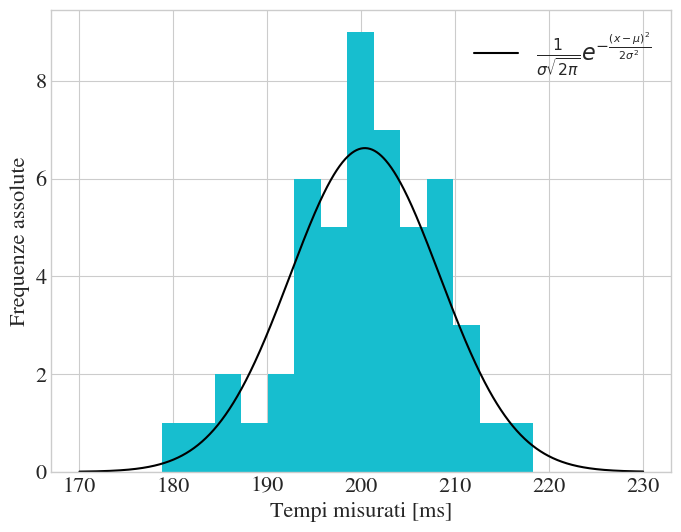

In [410]:
x = np.linspace(170, 230, 1000)
y = dati.size * larghezza * 1 / (devstd_emp * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * varianza_emp))

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xlabel("Tempi misurati [ms]")
ax.set_ylabel("Frequenze assolute")

ax.hist(dati, n_classi, range=intervallo, color="C9")
ax.plot(x, y, c='black', label=r"$\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$")

ax.legend()